## Data Standardization

### Feature Scaling

From Chris's T-Shirt Size, (Udacity - Feature Scaling), we learnt the importance of feature scaling, how one of two variables had unfavourable advantage just because of different unit or being too large in comparision to the other. To get rid of this bias, we do feature scaling. 

Let us right away perform for all features (sklearn has method which we could simply use) and look at its effect. 

In [16]:
def scale_df(input_df):
    """
    Scale/Normalize all the feature columns in the given data frame except 'email_address' and 'poi'
    Returns the scaled df
    """
    # clean
    temp_df = input_df[['poi','email_address']] # for repatch
    input_df = input_df.loc[:, input_df.columns.difference(['poi','email_address'])] # remove them if existing
    
    # scale
    from sklearn.preprocessing import scale
    input_df.loc[:] = scale(input_df.loc[:])
    
    # repatch
    input_df = pd.concat([input_df, temp_df],axis=1, sort=False)
    
    return input_df

In [17]:
from helpers_2 import init, split_data, tree_classify, evaluate
from helpers_2 import clean_df, remove_outliers
import pandas as pd



# raw data
data_dict = init()

# Dict to Df
df = pd.DataFrame.from_dict(data_dict, orient='index')  # ‘index’ means keys should be rows
 
#-------------- PANDAS AREA --------------------
# 1. PRE PROCESSING
# 1.1. Cleaning Invalid Values ('NaN')
df = clean_df(df)  
# 1.2. Remove Outliers
outlier_list = ['LAVORATO JOHN J', 'TOTAL', 'KAMINSKI WINCENTY J', 'BHATNAGAR SANJAY']  # iteration 1
outlier_list += ['KEAN STEVEN J', 'DERRICK JR. JAMES V', 'FREVERT MARK A', 'MARTIN AMANDA K'] # iteration 2
outlier_list += ['BELFER ROBERT'] # iteration 3
df = remove_outliers(df, outlier_list)

# 2. STANDARDIZATION
# 2.1. Feature Scaling
# fix exponential display format due to replace operation (ref: https://stackoverflow.com/questions/42735541/customized-float-formatting-in-a-pandas-dataframe)
pd.options.display.float_format = lambda x : '{:.5f}'.format(x) 
df = scale_df(df)
# 2.2. Feature Selection
features_list = ['poi','salary']
#-------------- PANDAS AREA --------------------

# Df to Dict
data_dict = df.to_dict('index') # ‘index’ means convert to dict like {index -> {column -> value}}

# CLASSIFIER
my_dataset = data_dict  # just for udacity's convention
labels, features = split_data(my_dataset, features_list)
clf = tree_classify(random_state=0)  # random state 0 to maintain consistent results everytime its run

# EVALUATION
trained_clf = evaluate(clf, my_dataset, features_list)

Udacity's Evaluation:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy: 0.81064	Precision: 0.31130	Recall: 0.26850	F1: 0.28832	F2: 0.27609
Total predictions: 14000
True positives:  537	False positives: 1188	False negatives: 1463	True negatives: 10812



<div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Wow, from 71%, we have gone to 81% accuracy. Note though, Recall took a hit reducing to 0.26 now. </div>

Let us visualize how the scaled features look like. 

**Note**, the scaling is to make each feature in favourable position to another. It was thus easier to check its effect on Chris's T-Shirt example. Here we have about 20 features, and there could be multitude of combinations possible, where the scaling contributed heavily restoring fairness to all features. This is difficult to visualize for all possible combinations. We could try 2D comparing each feature with one another  and so on, and still we would not have covered the big picture of scaling in its entirity. But we just observed the effect it had on final result. 

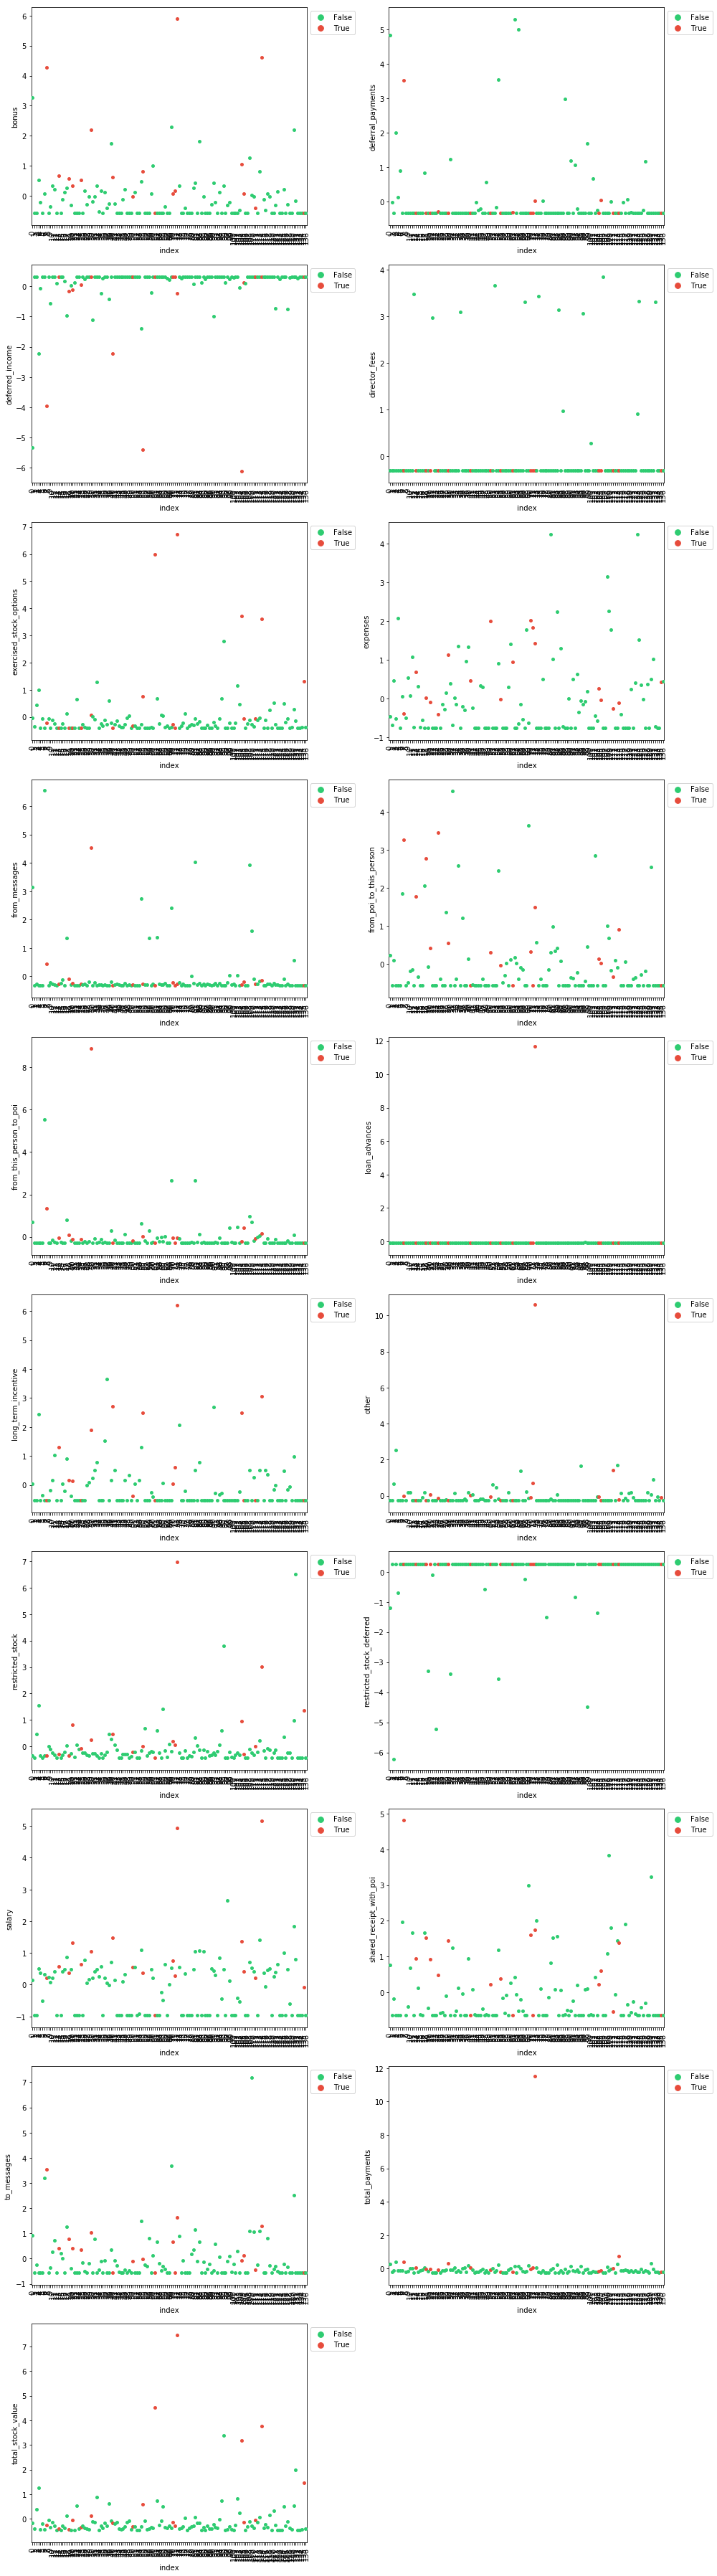

In [18]:
from helpers_2 import stripplots

stripplots(df)

## Feature Selection

### Feature Importance

So far, we have only used ```salary``` as the only feature for classification (though we have cleaned, and scaled all features). Since there are many features, it is difficult to choose manually one after another. So let us try this method:

1. Try all numerical features, and check the scores
2. List out the feature importance of each feature, to know which contributed heavily to decision tree classifier
3. Choose only those heavy features and check scores again. 

sklearn's decision tree classifier provides feature importance property which could reveal the influence of each feature on decision tree. Some times, the least influential features could also reduce scores, so we are trying to get rid of them here. 

### All features

In [19]:
def get_all_numerical_features_list(input_df):
    """
    Strips off ermail_address and poi in given df
    Creates list of features/columns
    Insert poi as list's first element
    Return the list
    """
    features_list = [x for x in input_df.columns.values if x != 'email_address' and x != 'poi']
    features_list.insert(0,'poi')   
    return features_list

print get_all_numerical_features_list(df)

['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [20]:
from helpers_2 import init, split_data, tree_classify, evaluate
from helpers_2 import clean_df, remove_outliers
import pandas as pd



# raw data
data_dict = init()

# Dict to Df
df = pd.DataFrame.from_dict(data_dict, orient='index')  # ‘index’ means keys should be rows
 
#-------------- PANDAS AREA --------------------
# 1. PRE PROCESSING
# 1.1. Cleaning Invalid Values ('NaN')
df = clean_df(df)  
# 1.2. Remove Outliers
outlier_list = ['LAVORATO JOHN J', 'TOTAL', 'KAMINSKI WINCENTY J', 'BHATNAGAR SANJAY']  # iteration 1
outlier_list += ['KEAN STEVEN J', 'DERRICK JR. JAMES V', 'FREVERT MARK A', 'MARTIN AMANDA K'] # iteration 2
outlier_list += ['BELFER ROBERT'] # iteration 3
df = remove_outliers(df, outlier_list)

# 2. STANDARDIZATION
# 2.1. Feature Scaling
# fix exponential display format due to replace operation (ref: https://stackoverflow.com/questions/42735541/customized-float-formatting-in-a-pandas-dataframe)
pd.options.display.float_format = lambda x : '{:.5f}'.format(x) 
df = scale_df(df)
# 2.2. Feature Selection
features_list = get_all_numerical_features_list(df)
#-------------- PANDAS AREA --------------------

# Df to Dict
data_dict = df.to_dict('index') # ‘index’ means convert to dict like {index -> {column -> value}}

# CLASSIFIER
my_dataset = data_dict  # just for udacity's convention
labels, features = split_data(my_dataset, features_list)
clf = tree_classify(random_state=0)  # random state 0 to maintain consistent results everytime its run

# EVALUATION
trained_clf = evaluate(clf, my_dataset, features_list)

Udacity's Evaluation:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy: 0.80050	Precision: 0.27911	Recall: 0.25050	F1: 0.26403	F2: 0.25574
Total predictions: 14000
True positives:  501	False positives: 1294	False negatives: 1499	True negatives: 10706



All 3 parameters have taken a hit a little, but its ok. It is just that some features are negatively affecting the result. Let us check the feature importance of the classifier now. Note, we captured back ```trained_clf``` from evaluate, with which we could check the feature importance of decision tree (we did not take clf because, that was not yet trained, only in evaluation, clf gets trained)

### Feature Importance

In [21]:
def print_feature_importance_list(trained_clf):
    """
    Given a trained clf, this function returns feature importance list
    Credit: https://medium.com/@williamkoehrsen/machine-learning-with-python-on-the-enron-dataset-8d71015be26d
    """
    # Get the feature importances of the DecisionTree Classifier
    tree_feature_importances = (trained_clf.feature_importances_)
    tree_features = zip(tree_feature_importances, features_list[1:])
    tree_features = sorted(tree_features, key= lambda x:x[0], reverse=True)

    # Display the feature names and importance values
    print('Tree Feature Importances:\n')
    for i in range(len(tree_features)):
        print('{} {} : {:.3f}'.format(i, tree_features[i][1], tree_features[i][0]))
        
print_feature_importance_list(trained_clf)

Tree Feature Importances:

0 bonus : 0.247
1 long_term_incentive : 0.171
2 other : 0.157
3 expenses : 0.114
4 salary : 0.083
5 exercised_stock_options : 0.080
6 from_poi_to_this_person : 0.064
7 to_messages : 0.048
8 shared_receipt_with_poi : 0.036
9 deferral_payments : 0.000
10 deferred_income : 0.000
11 director_fees : 0.000
12 from_messages : 0.000
13 from_this_person_to_poi : 0.000
14 loan_advances : 0.000
15 restricted_stock : 0.000
16 restricted_stock_deferred : 0.000
17 total_payments : 0.000
18 total_stock_value : 0.000


Great. So ```bonus``` and ```long_term_incentive``` are topping the list, followed by ```other``` which conceptually do not provide any insight much. So let us try with only these first two features. 

In [22]:
from helpers_2 import init, split_data, tree_classify, evaluate
from helpers_2 import clean_df, remove_outliers
import pandas as pd



# raw data
data_dict = init()

# Dict to Df
df = pd.DataFrame.from_dict(data_dict, orient='index')  # ‘index’ means keys should be rows
 
#-------------- PANDAS AREA --------------------
# 1. PRE PROCESSING
# 1.1. Cleaning Invalid Values ('NaN')
df = clean_df(df)  
# 1.2. Remove Outliers
outlier_list = ['LAVORATO JOHN J', 'TOTAL', 'KAMINSKI WINCENTY J', 'BHATNAGAR SANJAY']  # iteration 1
outlier_list += ['KEAN STEVEN J', 'DERRICK JR. JAMES V', 'FREVERT MARK A', 'MARTIN AMANDA K'] # iteration 2
outlier_list += ['BELFER ROBERT'] # iteration 3
df = remove_outliers(df, outlier_list)

# 2. STANDARDIZATION
# 2.1. Feature Scaling
# fix exponential display format due to replace operation (ref: https://stackoverflow.com/questions/42735541/customized-float-formatting-in-a-pandas-dataframe)
pd.options.display.float_format = lambda x : '{:.5f}'.format(x) 
df = scale_df(df)
# 2.2. Feature Selection
features_list = ['poi','bonus','long_term_incentive']
#-------------- PANDAS AREA --------------------

# Df to Dict
data_dict = df.to_dict('index') # ‘index’ means convert to dict like {index -> {column -> value}}

# CLASSIFIER
my_dataset = data_dict  # just for udacity's convention
labels, features = split_data(my_dataset, features_list)
clf = tree_classify(random_state=0)  # random state 0 to maintain consistent results everytime its run

# EVALUATION
trained_clf = evaluate(clf, my_dataset, features_list)

Udacity's Evaluation:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy: 0.83814	Precision: 0.41677	Recall: 0.33300	F1: 0.37021	F2: 0.34695
Total predictions: 14000
True positives:  666	False positives:  932	False negatives: 1334	True negatives: 11068



Great. 

1. We have achieved accuracy 83%, which is greater than 80% (zero prediction accuracy)
2. We have Precision and Recall scores higher than 0.3 as per project expectation. 

This nearly concludes our Data Standardization and also the project. 

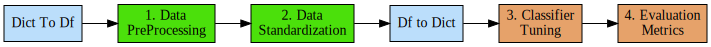

In [23]:
from graphviz import Digraph
g = Digraph('Work Flow',  node_attr={'shape': 'record'})
g.attr(rankdir='LR')

g.node('step_0', r'Dict To Df', style='filled', fillcolor='#BBDEFB')
g.node('step_1', r'1. Data\nPreProcessing',style='filled', fillcolor='#4be00b')
g.node('step_2', r'2. Data\nStandardization', style='filled', fillcolor='#4be00b')
g.node('step_2_5', r'Df to Dict', style='filled', fillcolor='#BBDEFB')

g.node('step_3', r'3. Classifier\nTuning', style='filled', fillcolor='#e6a26a')
g.node('step_4', r'4. Evaluation\nMetrics', style='filled', fillcolor='#e6a26a')

g.edges([('step_0','step_1'),('step_1','step_2'),('step_2','step_2_5'),('step_2_5','step_3'),('step_3','step_4')])
g

**Note:** 

Many further improvements possible. 

1. We did not try adding new features (for eg, ratio of ```from_messages_to_poi/from_messages``` could be interesting)
2. We did not try tuning our tree classifier (pipeline could help try multiple parameters)
3. We did not try again how with current cleaner data, other classifiers fare (again pipeline could help here to try all at once)

Since I plan to take more Udacity courses, where overlap of these topics are very likely, I intend to explore in depth later on, and for now, close this project with minimal expected results.